# RISK ADJUSTMENT ANALYSIS USING DIABETES DATA
This project analyzes diabetes-related health indicators to identify high-risk patients, documentation gaps, and trends that could impact risk adjustment coding and reimbusment

**Dataset:** [Diabetes Health Indicators on Kaggle](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset)

In [ ]:
# install required libraries
!pip install pandas matplotlib seaborn sqlite3

In [30]:
# import libraries
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# load dataset
df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [32]:
# rename columns for sqlite compatability
df.rename(columns={
    'Diabetes_012': 'Diabetes',
    'HighBP': 'HighBP',
    'HighChol': 'HighChol',
    'CholCheck': 'CholCheck',
    'BMI': 'BMI',
    'Smoker': 'Smoker',
    'Stroke': 'Stroke',
    'HeartDiseaseorAttack': 'HeartDisease',
    'PhysActivity': 'PhysActivity',
    'Fruits': 'Fruits',
    'Veggies': 'Veggies',
    'HvyAlcoholConsump': 'Alcohol',
    'AnyHealthcare': 'Healthcare',
    'NoDocbcCost': 'NoDocCost',
    'GenHlth': 'GeneralHealth',
    'MentHlth': 'MentalHealth',
    'PhysHlth': 'PhysicalHealth',
    'DiffWalk': 'DiffWalk',
    'Sex': 'Sex',
    'Age': 'Age',
    'Education': 'Education',
    'Income': 'Income'
}, inplace=True)


In [33]:
# add PatientID column
df['PatientID'] = df.index + 1

In [34]:
# create SQLite database
conn = sqlite3.connect('diabetes.db')

# Load dataframe into SQL table
df.to_sql('patients', conn, if_exists='replace', index=False)

253680

---
### Identify High-Risk Diabetic Patients (BMI > 30)

In [35]:
query = """
SELECT PatientID, BMI, Diabetes, Stroke, HeartDisease, PhysicalHealth, MentalHealth
FROM patients
WHERE Diabetes = 1 AND BMI > 30
ORDER BY BMI DESC
"""
pd.read_sql_query(query, conn)

,PatientID,BMI,Diabetes,Stroke,HeartDisease,PhysicalHealth,MentalHealth
0,36325,96.0,1.0,0.0,0.0,0.0,0.0
1,76447,84.0,1.0,0.0,0.0,2.0,14.0
2,79490,84.0,1.0,0.0,0.0,12.0,10.0
3,76498,81.0,1.0,0.0,1.0,0.0,0.0
4,79540,79.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2041,249864,31.0,1.0,0.0,0.0,0.0,0.0
2042,250420,31.0,1.0,0.0,0.0,0.0,0.0
2043,252116,31.0,1.0,0.0,0.0,0.0,0.0
2044,252209,31.0,1.0,0.0,0.0,1.0,0.0


---
### Find Patients with Multiple Comorbidities

In [36]:
query = """
SELECT PatientID, Diabetes, Stroke, HeartDisease, HighBP, HighChol
FROM patients
WHERE Diabetes = 1 AND (Stroke = 1 OR HeartDisease = 1 OR HighBP = 1 OR HighChol = 1)
"""
pd.read_sql_query(query, conn)

,PatientID,Diabetes,Stroke,HeartDisease,HighBP,HighChol
0,65,1.0,0.0,0.0,1.0,1.0
1,82,1.0,0.0,0.0,1.0,1.0
2,194,1.0,0.0,0.0,1.0,1.0
3,237,1.0,0.0,0.0,1.0,1.0
4,276,1.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...
3823,253529,1.0,0.0,0.0,1.0,0.0
3824,253530,1.0,0.0,0.0,1.0,0.0
3825,253567,1.0,0.0,1.0,0.0,0.0
3826,253665,1.0,0.0,0.0,0.0,1.0


---
### Average Physical Health Days by Diabetes Status

In [37]:
query = """
SELECT Diabetes, AVG(PhysicalHealth) AS AvgPhysicalHealthDays
FROM patients
GROUP BY Diabetes
"""
pd.read_sql_query(query, conn)


,Diabetes,AvgPhysicalHealthDays
0,0.0,3.582416
1,1.0,6.348305
2,2.0,7.954479


---
### BMI Distribution by Diabetes Status

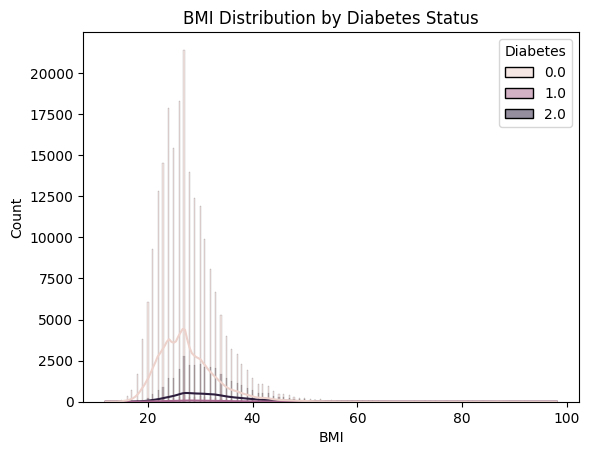

In [38]:
sns.histplot(data=df, x='BMI', hue='Diabetes', kde=True)
plt.title('BMI Distribution by Diabetes Status')
plt.show()

---
### Comorbidity Heatmap

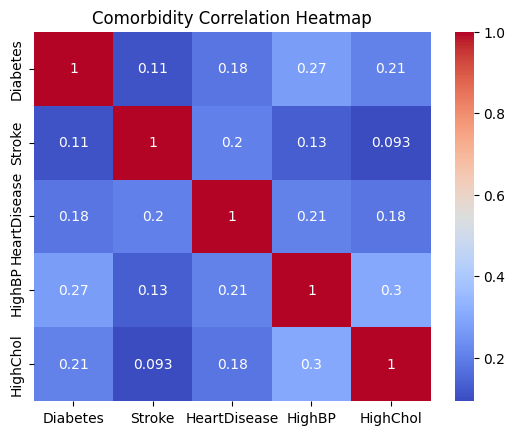

In [39]:
comorbid = df[['Diabetes', 'Stroke', 'HeartDisease', 'HighBP', 'HighChol']]
sns.heatmap(comorbid.corr(), annot=True, cmap='coolwarm')
plt.title('Comorbidity Correlation Heatmap')
plt.show()

---
## Diabetes Risk Analysis
- **High comorbidity prevalence:**
Many diabetic patients also present with hypertension and high cholesterol, indicating a strong overlap in cardiovascular risk factors.

- **Obesity as a key driver:**
Over 2,000 patients have BMI > 30, with extreme cases (BMI > 80) linked to increased risk of stroke, heart disease, and limited mobility.
_Targeted weight management programs are crucial._

- **Documentation and reimbursement gaps:**
Several high-risk patients show low healthcare utilization or cost-related care avoidance, suggesting under-documented chronic conditions and missed HCC opportunities.

- **Quality of life impact:**
Average poor physical health days increase with diabetes severity (from ~3.6 to ~8 days per month), highlighting the growing burden on productivity and well-being.

- **Comorbidity patterns:**
The heatmap reveals clustering among high blood pressure, high cholesterol, and heart disease, supporting integrated chronic disease management strategies.

- **Preventive and early intervention focus:**
Early-stage diabetes management shows potential to preserve quality of life and reduce healthcare costs over time.

---
# Conclusion
This analysis highlights how important it is for healthcare teams to work together and keep accurate records when treating people with diabetes. By focusing on patients who have other health issues, are overweight, or don’t have complete medical records, healthcare providers can help these patients get better care and also receive proper payment for their services.

It also shows that taking action early and focusing on preventing health problems can save money in the long run and help keep communities healthier.